## Retriving income per capita data from Census
Here I used income data rather than mean income. Mean can tell us so little which may not be useful if we want to find valuable info in later stage.
https://data.census.gov/cedsci/tableq=income&g=0400000US17_0500000US17031&tid=ACSST1Y2019.S1901&hidePreview=true&moe=false

Notes from Natasia: I think it would make sense, but let me think about how to use the map with this. 

In [1]:
import requests
import pandas as pd
import os
import matplotlib.pyplot as plt
import geopandas
import censusdata
import numpy as np
from census import Census
import us

In [2]:
# panda table setting 
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.precision', 2)

In [3]:
# path = r'/Users/bowenli/Documents/GitHub/Data-II-Project'
path = r'C:/Users/ShrekTheOger/Documents/GitHub/Data-II-Project'
#path = r'C:\Users\engel\Documents\GitHub\Data-II-Project'

# Getting population data of Cook County
https://data.census.gov/cedsci/table?q=native%20and%20foreign%20born%20place%20of%20birth&t=Populations%20and%20People&g=0100000US_0500000US17031&tid=ACSDT5Y2019.B05002&hidePreview=true&moe=false&tp=false

Data includes total county population, In state/out state population, Native/Foreign born population, and Us/Non US citizens.

In [4]:
col_list = ['Year', 'id', 'Geographic Area Name', 'Estimate!!Total',
       'Estimate!!Total!!Native',
       'Estimate!!Total!!Native!!Born in state of residence',
       'Estimate!!Total!!Native!!Born in other state in the United States',
       'Estimate!!Total!!Native!!Born outside the United States',
       'Estimate!!Total!!Foreign born',
       'Estimate!!Total!!Foreign born!!Naturalized U.S. citizen',
       'Estimate!!Total!!Foreign born!!Not a U.S. citizen']

In [5]:
def pop_data_retrive(y):
    pop = os.path.join(path,'productDownload_2021-11-13T114325',f'ACSDT5Y{y}.B05002_data_with_overlays_2021-11-13T114317.csv')
    df = pd.read_csv(pop)
    return df

In [6]:
def pop_df_clean(df,y):
    df.columns = df.iloc[0]
    df.drop(index = [0,1], inplace = True)
    df = df.loc[:, ~df.columns.str.contains('Error', case = False)]
    df.insert(0,'Year',y)
    df =df[col_list]
    return df

In [7]:
def pop_df_concat(df,pop_df):
    pop_df = pop_df.append(df)
    return pop_df

In [8]:
def pop_df_go():
    years = list(range(2010,2020))
    pop_df = pd.DataFrame()
    for i in years:
        if i != 2019:
            df = pop_data_retrive(i)
            df = pop_df_clean(df,i)
            pop_df = pop_df_concat(pop_df,df)
        else:
            df = pop_data_retrive(i)
            df.loc[0,:] = [i.replace(':', '') for i in list(df.loc[0])]
            df
            df = pop_df_clean(df,i)
            pop_df = pop_df_concat(pop_df,df)
    return pop_df

In [9]:
pop_df_go()

0  Year              id   Geographic Area Name Estimate!!Total Estimate!!Total!!Native Estimate!!Total!!Native!!Born in state of residence Estimate!!Total!!Native!!Born in other state in the United States Estimate!!Total!!Native!!Born outside the United States Estimate!!Total!!Foreign born Estimate!!Total!!Foreign born!!Naturalized U.S. citizen Estimate!!Total!!Foreign born!!Not a U.S. citizen
2  2019  0500000US17031  Cook County, Illinois         5198275                 4099447                                            3198804                                              819189                                                             81454                            1098828                                             556813                                                 542015
2  2018  0500000US17031  Cook County, Illinois         5223719                 4124060                                            3217517                                              824977                                                             81566                            1099659                                             550515                                                 549144
2  2017  0500000US17031  Cook County, Illinois         5238541                 4133162                                            3230676                                              822928                                                             79558                            1105379                                             544484                                                 560895
2  2016  0500000US17031  Cook County, Illinois         5227575                 4125845                                            3222677                                              824586                                                             78582                            1101730                                             534110                                                 567620
2  2015  0500000US17031  Cook County, Illinois         5236393                 4127954                                            3224748                                              825134                                                             78072                            1108439                                             529912                                                 578527
2  2014  0500000US17031  Cook County, Illinois         5227827                 4126072                                            3220139                                              828693                                                             77240                            1101755                                             518184                                                 583571
2  2013  0500000US17031  Cook County, Illinois         5212372                 4113454                                            3205604                                              832394                                                             75456                            1098918                                             506222                                                 592696
2  2012  0500000US17031  Cook County, Illinois         5197677                 4098252                                            3186629                                              836550                                                             75073                            1099425                                             500383                                                 599042
2  2011  0500000US17031  Cook County, Illinois         5182969                 4092973                                            3175519                                              844343                                                             73111                            1089996                                             491133                                                 598863
2  2010  0500000US17031  Cook 

In [10]:
index_2010= ['Year','id','Geographic Area Name',
             'Households!!Estimate!!Total',
             'Households!!Estimate!!Less than $10,000',
             'Households!!Estimate!!$10,000 to $14,999',
             'Households!!Estimate!!$15,000 to $24,999',
             'Households!!Estimate!!$25,000 to $34,999',
             'Households!!Estimate!!$35,000 to $49,999',
             'Households!!Estimate!!$50,000 to $74,999',
             'Households!!Estimate!!$75,000 to $99,999',
             'Households!!Estimate!!$100,000 to $149,999',
             'Households!!Estimate!!$150,000 to $199,999',
             'Households!!Estimate!!$200,000 or more',
             'Households!!Estimate!!Median income (dollars)',
             'Households!!Estimate!!Mean income (dollars)']

In [11]:
def income_data_retrive(y):
    pop = os.path.join(path,'productDownload_2021-11-15T220401',f'ACSST1Y{y}.S1901_data_with_overlays_2021-11-15T220349.csv')
    df = pd.read_csv(pop)
    return df

In [12]:
def income_df_clean(df,y):
    df.columns = df.iloc[0]
    df.drop(index = [0], inplace = True)
    df = df.loc[:, ~df.columns.str.contains('Error', case = False)]
    df.insert(0,'Year',y)
    df = df.iloc[:,:16]
    df = df.T
    df.columns = ["%s-%s"%(df.iloc[0,0],df.iloc[2,0]),"%s-%s"%(df.iloc[0,1],df.iloc[2,1][:11])]
    df.index.name = None
    index_name = df.index.tolist()
    index_lib = dict(zip(index_name, index_2010))
    df.rename(index = index_lib, inplace = True)
    return df

In [13]:
def income_df_go():
    years = list(range(2010,2020))
    income_df = pd.DataFrame()
    for i in years:
        df = income_data_retrive(i)
        df = income_df_clean(df,i)
        income_df = pd.concat([income_df, df], axis = 1)
    return income_df

In [14]:
income_df_go()

2010-Illinois       2010-Cook County 2011-Illinois       2011-Cook County 2012-Illinois       2012-Cook County 2013-Illinois       2013-Cook County 2014-Illinois       2014-Cook County 2015-Illinois       2015-Cook County 2016-Illinois       2016-Cook County 2017-Illinois       2017-Cook County 2018-Illinois       2018-Cook County 2019-Illinois       2019-Cook County
Year                                                   2010                   2010          2011                   2011          2012                   2012          2013                   2013          2014                   2014          2015                   2015          2016                   2016          2017                   2017          2018                   2018          2019                   2019
id                                              0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031   0400000US17         0500000US17031
Geographic Area Name                               Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois      Illinois  Cook County, Illinois
Households!!Estimate!!Total                         4752857                1922125       4737208                1916910       4770194                1936001       4783421                1939894       4772421                1938055       4794523                1954712       4822046                1963973       4808672                1948373       4864864                1981796       4866006                1985613
Households!!Estimate!!Less than $10,000                 7.1                    8.6           7.6                    9.0           7.5                    9.1           7.7                    9.2           7.3                    8.6           6.8                    8.1           7.0                    8.3           6.7                    7.8           6.4                    7.3           5.9                    7.0
Households!!Estimate!!$10,000 to $14,999                4.9                    5.1           5.0                    5.2           4.9                    5.5           4.7                    5.1           4.6                    4.9           4.3                    4.7           4.3                    4.5           4.1                    4.2           3.8                    3.9           3.7                    4.0
Households!!Estimate!!$15,000 to $24,999               11.0                   11.5          11.1                   11.4          10.4                   10.6           9.9                   10.3           9.9                   10.6           9.8                   10.5           9.3                    9.5           8.9                    9.4           8.8                    9.2           8.0                    7.9
Households!!Estimate!!$25,000 to $34,999               10.2                    9.8          10.0                   10.3           9.7                    9.7           9.7                    9.5           9.3                    9.1           9.1                    9.2           8.8                    8.7           8.4                    8.5           8.5                    8.5           8.0                    8.2
Households!!Estimate!!$35,000 to $49,999               13.8                   13.5          13.2                   13.3          13.2                   13.1          13.0                   12.6          12.8                   12.4          12.6                   11.9          12.3                   11

## Read Data Using API 

In [15]:
# references 
# https://towardsdatascience.com/mapping-us-census-data-with-python-607df3de4b9c
# https://pypi.org/project/CensusData/
# https://towardsdatascience.com/using-the-us-census-api-for-data-analysis-a-beginners-guide-98063791785c

# function for retrieving population data
def get_acs5_county_population(year):
    data = censusdata.download('acs5', year, censusdata.censusgeo([('county', '*')]),
                               ['B05002_001E', 'B05002_002E', 'B05002_003E', 'B05002_004E', 'B05002_009E', 'B05002_013E'])
    
    # create dictionary for the column names
    column_names = {'B05002_001E': 'total_population', 'B05002_002E': 'total_native', 
                    'B05002_003E': 'total_born_in_state', 'B05002_004E': 'total_born_out_state',
                    'B05002_009E': 'total_born_outside_US', 'B05002_013E': 'total_foreign_born'}
    
    # create new column for county name and state name, the index would be FIPS codes 
    new_indices = []
    county_names = []
    state_names = []
    
    for index in data.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
        state_name = index.name.split(',')[1]
        state_names.append(state_name)

    data.index = new_indices
    data['county_name'] = county_names
    data['state_name'] = state_names
    
    # replace column names 
    data = data.rename(column_names, axis=1) 
    return data

In [16]:
# function for retrieving income data
def get_acs5_county_income(year):
    data = censusdata.download('acs5', year, censusdata.censusgeo([('county', '*')]), ['B19301_001E'])
    
    # create dictionary for the column names
    column_names = {'B19301_001E': 'income_past12m'}
    
    # create new column for county name and state name, the index would be FIPS codes 
    new_indices = []
    county_names = []
    state_names = []
    
    for index in data.index.tolist():
        new_index = index.geo[0][1] + index.geo[1][1]
        new_indices.append(new_index)
        county_name = index.name.split(',')[0]
        county_names.append(county_name)
        state_name = index.name.split(',')[1]
        state_names.append(state_name)

    data.index = new_indices
    data['county_name'] = county_names
    data['state_name'] = state_names
    
    # replace column names 
    data = data.rename(column_names, axis=1) 
    return data

In [17]:
population_2010 = get_acs5_county_population(2010)
population_2015 = get_acs5_county_population(2015)
population_2019 = get_acs5_county_population(2019)

In [18]:
income_2010 = get_acs5_county_income(2010)
income_2015 = get_acs5_county_income(2015)
income_2019 = get_acs5_county_income(2019)

## Read CSV Files 

In [19]:
# https://developer.ipums.org/docs/workflows/create_extracts/nhgis_data/
# The API might not be available for vintage data, hence we downloaded the csv files and read those instead

In [20]:
# Read NHGIS IPUMS data for population 

In [21]:
# turns out the table is slightly different so I couldn't generalized 
# but here is the generalized funciton that I tried 
def get_nhgis_county_income(path, folder, fname):
    data = os.path.join(path, folder, fname)
    income = pd.read_csv(data)
    
    income = income.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                          'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                          'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                          'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                          'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)
    
    names_income = {'E01001': 'per_capita_income'}
    
    income = income.rename(names_income, axis=1) 
    income = income.iloc[2:]
    income = income.reset_index(drop = True)
    income['index'] = income['STATEA'] + income['COUNTYA']
    
    return income

In [22]:
income_1990_data = get_nhgis_county_income(path, 'IPUMS NHGIS', 'income_1990_county.csv')

In [23]:
income_1990_data.head()

GISJOIN  YEAR COUNTYA    STATE STATEA        ANPSADPI per_capita_income  index
0  G0100030  1990     003  Alabama     01  Baldwin County             12275  01003
1  G0100050  1990     005  Alabama     01  Barbour County              9515  01005
2  G0100070  1990     007  Alabama     01     Bibb County              8973  01007
3  G0100090  1990     009  Alabama     01   Blount County             10168  01009
4  G0100110  1990     011  Alabama     01  Bullock County              6922  01011

In [24]:
income_1990 = os.path.join(path, 'IPUMS NHGIS', 'income_1990_county.csv')
income_1990_data = pd.read_csv(income_1990)

income_1990_data = income_1990_data.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                                          'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                                          'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                                          'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                                          'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)
names_income = {'E01001': 'per_capita_income'}

income_1990_data = income_1990_data.rename(names_income, axis=1) 
income_1990_data = income_1990_data.iloc[2:]
income_1990_data = income_1990_data.reset_index(drop = True)
income_1990_data['index'] = income_1990_data['STATEA'] + income_1990_data['COUNTYA']

In [25]:
income_1990_data.head()

GISJOIN  YEAR COUNTYA    STATE STATEA        ANPSADPI per_capita_income  index
0  G0100030  1990     003  Alabama     01  Baldwin County             12275  01003
1  G0100050  1990     005  Alabama     01  Barbour County              9515  01005
2  G0100070  1990     007  Alabama     01     Bibb County              8973  01007
3  G0100090  1990     009  Alabama     01   Blount County             10168  01009
4  G0100110  1990     011  Alabama     01  Bullock County              6922  01011

In [26]:
income_2000 = os.path.join(path, 'IPUMS NHGIS', 'income_2000_county.csv')
income_2000_data = pd.read_csv(income_2000)

income_2000_data = income_2000_data.drop(['TRACTA', 'CTY_SUBA', 'PLACEA', 'NECMAA', 'URB_AREAA', 'URBRURALA', 
                                          'TRBL_CTA', 'CD106A', 'CD108A', 'CD109A', 'ZIP3A', 'ZCTAA', 
                                          'BLCK_GRPA', 'TRBL_BGA', 'C_CITYA', 'AIANHHA', 'RES_ONLYA', 
                                          'TRUSTA', 'TRBL_SUBA', 'ANRCA', 'REGIONA', 'DIVISIONA',
                                          'MSA_CMSAA', 'COUNTY', 'PMSAA'], axis=1)
    
names_income = {'GNW001': 'per_capita_income'}

income_2000_data = income_2000_data.rename(names_income, axis=1) 
income_2000_data = income_2000_data.iloc[2:]
income_2000_data = income_2000_data.reset_index(drop = True)
income_2000_data['index'] = income_2000_data['STATEA'] + income_2000_data['COUNTYA']

In [27]:
income_2000_data.head()

GISJOIN  YEAR    STATE STATEA COUNTYA            NAME per_capita_income  index
0  G0100030  2000  Alabama     01     003  Baldwin County             20826  01003
1  G0100050  2000  Alabama     01     005  Barbour County             13316  01005
2  G0100070  2000  Alabama     01     007     Bibb County             14105  01007
3  G0100090  2000  Alabama     01     009   Blount County             16325  01009
4  G0100110  2000  Alabama     01     011  Bullock County             10163  01011

In [28]:
# nativity (population) 2000 
population_1990 = os.path.join(path, 'IPUMS NHGIS', 'nativity_1990_county.csv')
population_1990_data = pd.read_csv(population_1990)

population_1990_data = population_1990_data.drop(['ANRCA', 'AIANHHA', 'RES_ONLYA', 'TRUSTA',
                                                  'RES_TRSTA', 'BLCK_GRPA', 'TRACTA', 'CD101A',
                                                  'C_CITYA', 'CTY_SUBA', 'PLACEA', 'PMSAA',
                                                  'URB_AREAA', 'ZIPA', 'CD103A', 'COUNTY',
                                                  'DIVISIONA', 'MSA_CMSAA', 'REGIONA', 'URBRURALA'], axis=1)

population_1990_data = population_1990_data.iloc[2:]
population_1990_data['total_born_out_state'] = population_1990_data['E3N002'].astype(float) + population_1990_data['E3N003'].astype(float) + population_1990_data['E3N004'].astype(float) + population_1990_data['E3N005'].astype(float)
population_1990_data['total_born_outside_US'] = population_1990_data['E3N006'].astype(float) + population_1990_data['E3N007'].astype(float) + population_1990_data['E3N008'].astype(float) 

population_1990_data = population_1990_data.drop(['E3N002', 'E3N003', 'E3N004', 'E3N005', 'E3N006',
                                                  'E3N007', 'E3N008'], axis=1)

names_population = {'E3N001': 'total_born_in_state', 'E3N009': 'total_foreign_born'}

population_1990_data = population_1990_data.rename(names_population, axis=1) 

# i need to clean the data so all would have the same format

In [29]:
population_1990_data.head()

GISJOIN  YEAR COUNTYA    STATE STATEA        ANPSADPI total_born_in_state total_foreign_born  total_born_out_state  total_born_outside_US
2  G0100030  1990     003  Alabama     01  Baldwin County               63928                975               32789.0                  588.0
3  G0100050  1990     005  Alabama     01  Barbour County               19237                 82                6022.0                   76.0
4  G0100070  1990     007  Alabama     01     Bibb County               14775                 18                1759.0                   24.0
5  G0100090  1990     009  Alabama     01   Blount County               33869                247                5043.0                   89.0
6  G0100110  1990     011  Alabama     01  Bullock County                9922                 24                1096.0                    0.0

In [30]:
# nativity (population) 2000 
population_2000 = os.path.join(path, 'IPUMS NHGIS', 'nativity_2000_county.csv')
population_2000_data = pd.read_csv(population_2000)

population_2000_data = population_2000_data.drop(['REGIONA', 'DIVISIONA', 'CTY_SUBA', 'PLACEA',
                                                  'CD108A', 'CD109A', 'ZIP3A', 'ZCTAA', 'TRACTA',
                                                  'TRBL_CTA', 'BLCK_GRPA', 'TRBL_BGA', 'C_CITYA', 
                                                  'AIANHHA', 'RES_ONLYA', 'TRUSTA', 'NECMAA', 
                                                  'TRBL_SUBA', 'ANRCA', 'URB_AREAA', 'URBRURALA', 
                                                  'CD106A', 'MSA_CMSAA', 'COUNTY', 'PMSAA'], axis=1)

names_population = {'GI8001': 'total_native', 'GI9001': 'total_born_in_state', 
                    'GI9002': 'total_born_out_state', 'GI9003': 'total_born_outside_US', 
                    'GI8002': 'total_foreign_born'}

population_2000_data = population_2000_data.rename(names_population, axis=1) 
population_2000_data = population_2000_data.iloc[2:]
population_2000_data = population_2000_data.reset_index(drop = True)
population_2000_data['index'] = population_2000_data['STATEA'] + population_2000_data['COUNTYA']
population_2000_data['total_population'] = population_2000_data['total_native'].astype(float) + population_2000_data['total_foreign_born'].astype(float)

In [31]:
population_2000_data.head()

GISJOIN  YEAR    STATE STATEA COUNTYA            NAME total_native total_foreign_born total_born_in_state total_born_out_state total_born_outside_US  index  total_population
0  G0100030  2000  Alabama     01     003  Baldwin County       137458               2957               81709                54637                  1112  01003          140415.0
1  G0100050  2000  Alabama     01     005  Barbour County        28603                435               21707                 6826                    70  01005           29038.0
2  G0100070  2000  Alabama     01     007     Bibb County        20737                 89               18303                 2387                    47  01007           20826.0
3  G0100090  2000  Alabama     01     009   Blount County        49443               1581               41300                 7893                   250  01009           51024.0
4  G0100110  2000  Alabama     01     011  Bullock County        11356                358               10035                 1291                    30  01011           11714.0

In [32]:
# Read Universities R&D Data based on Names 
rd = os.path.join(path, 'NCSES', 'HERD_data.csv')
rd_data = pd.read_csv(rd, skiprows=10)

rd_data = rd_data.iloc[2:,:-1]
column_names = {'Unnamed: 0': 'state_name', '<Fiscal Year>': 'institution_name'}
rd_data = rd_data.rename(column_names, axis=1) 
rd_data = rd_data[rd_data['institution_name'].str.contains('Total for selected values')==False]
rd_data.iloc[:,2:] = rd_data.iloc[:,2:].replace({'-':np.nan}).replace(r',','',regex=True)
rd_data.iloc[:,2:] = rd_data.iloc[:,2:].astype(float)
rd_data = rd_data.sort_values(['2010'], ascending = False)

#rd_data  = rd_data.nlargest(20,'2010')
rd_data = rd_data.head(20)

rd_data = rd_data.reset_index(drop = True)

In [33]:
rd_data

state_name                                   institution_name       2019       2018       2017       2016       2015       2014       2013       2012  ...      1982      1981      1980      1979      1978      1977      1976      1975      1974      1973
0         Maryland                                   Johns Hopkins U.  2597238.0  2416268.0  2373646.0  2294982.0  2200312.0  2162885.0  2131165.0  2106185.0  ...  590129.0  584560.0  598977.0  613165.0  182257.0  184941.0  181944.0  189191.0  186417.0  168645.0
1         Michigan                             U. Michigan, Ann Arbor  1491880.0  1453619.0  1417476.0  1355976.0  1306704.0  1301372.0  1351399.0  1322711.0  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
2        Wisconsin                               U. Wisconsin-Madison  1154945.0  1094633.0  1105543.0  1092825.0  1020221.0  1069218.0  1104123.0  1169779.0  ...  320608.0  318840.0  326915.0  315224.0  301500.0  299632.0  296227.0  319732.0  315142.0  335953.0
3       Washington                             U. Washington, Seattle  1269137.0  1283849.0  1248951.0  1206102.0  1126613.0  1134588.0  1171945.0  1109008.0  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
4   North Carolina                                            Duke U.  1091903.0  1060213.0  1043949.0   996632.0   989322.0  1000013.0   975697.0  1009911.0  ...  101065.0  100291.0   92414.0   95395.0   93549.0   90745.0   90464.0   89756.0   77636.0   88819.0
5       California                           U. California, San Diego  1205183.0  1148822.0  1049998.0  1026215.0  1051130.0  1029503.0  1057003.0  1073864.0  ...  282698.0  297877.0  295297.0  277920.0  266046.0  262011.0  261208.0  257626.0  246031.0  266481.0
6       California                         U. California, Los Angeles  1162997.0  1196868.0   997624.0   979404.0   974558.0   914543.0   949986.0  1003375.0  ...  210239.0  210307.0  210381.0  194727.0  201893.0  207122.0  199400.0  193747.0  183093.0  208636.0
7       California                       U. California, San Francisco  1420031.0  1448954.0  1305625.0  1221755.0  1075135.0  1045555.0  1024854.0  1032673.0  ...  193932.0  192791.0  173696.0  157699.0  158053.0  148523.0  151866.0  144934.0  124178.0  116142.0
8       California                                        Stanford U.  1071960.0  1051120.0  1028001.0  1006535.0   975822.0   925200.0   929143.0   903238.0  ...  277548.0  280582.0  267596.0  262266.0  246359.0  230269.0  230939.0  224050.0  197494.0  215391.0
9     Pennsylvania                                    U. Pennsylvania  1340965.0  1309300.0  1273105.0  1223801.0   824581.0   798949.0   814134.0   847077.0  ...  229661.0  225685.0  222834.0  211402.0  213664.0  211439.0  221168.0  206461.0  193486.0  161966.0
10    Pennsylvania                          U. Pittsburgh, Pittsburgh   962313.0   913933.0   870516.0   839946.0   821849.0   826395.0   857683.0   866638.0  ...   94741.0   84640.0   75375.0   77382.0   80859.0   71629.0   63123.0   58505.0   51608.0   60040.0
11        New York                Columbia U. in the City of New York   893465.0   860351.0   827306.0   790405.0   828485.0   859030.0   873852.0   889487.0  ...  235559.0  217724.0  239887.0  213646.0  208429.0  218098.0  212778.0  228476.0  206701.0  228924.0
12       Minnesota                          U. Minnesota, Twin Cities   901920.0   866870.0   853818.0   859192.0   840375.0   845747.0   843573.0   826173.0  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
13    Pennsylvania  Pennsylvania State U., University Park and Her...   845449.0   825124.0   791875.0   779312.0   754882.0   772351.0   823429.0   797679.0  ...       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN       NaN
14  North Carolina                     U. North Carolina, Chape

In [34]:
rd_data.state_name.unique()

array(['Maryland', 'Michigan', 'Wisconsin', 'Washington',
       'North Carolina', 'California', 'Pennsylvania', 'New York',
       'Minnesota', 'Ohio', 'Missouri', 'Texas'], dtype=object)

In [35]:
# Read Universities R&D Data based on ID 
# # https://stackoverflow.com/questions/45416684/python-pandas-replace-multiple-columns-zero-to-nan
rd_id = os.path.join(path, 'NCSES', 'HERD_data_IPEDS.csv')
rd_id_data = pd.read_csv(rd_id, skiprows=10)


rd_id_data = rd_id_data.iloc[2:]
column_names_id = {'Unnamed: 0': 'state_name', '<Fiscal Year>': 'IPEDSID'}
rd_id_data = rd_id_data.rename(column_names_id, axis=1) 
rd_id_data = rd_id_data[rd_id_data['IPEDSID'].str.contains('Total for selected values') == False]
rd_id_data = rd_id_data[rd_id_data['IPEDSID'].str.contains('No match or exact match for IPEDS UnitID') == False]
rd_id_data.iloc[:,2:] = rd_id_data.iloc[:,2:].replace({'-':np.nan}).replace(r',','',regex=True)
rd_id_data.iloc[:,2:] = rd_id_data.iloc[:,2:].astype(float)
rd_id_data  = rd_id_data.sort_values(['2010'], ascending = False)

rd_id_data = rd_id_data.head(20)

rd_id_data = rd_id_data.reset_index(drop = True)

In [36]:
rd_data = rd_data.iloc[2:,:-1]
column_names = {'Unnamed: 0': 'state_name', '<Fiscal Year>': 'institution_name'}
rd_data = rd_data.rename(column_names, axis=1) 
rd_data = rd_data[rd_data['institution_name'].str.contains('Total for selected values')==False]
rd_data = rd_data.reset_index(drop = True)

rd_data['2010'] = rd_data['2010'].replace(',','')


In [37]:
# select column that align with the year that we are
rd_data_filter = rd_data[['state_name', 'institution_name', '2019', '2015', '2010', '2000', '1990']]
rd_id_data_filter = rd_id_data[['state_name', 'IPEDSID', '2019', '2015', '2010', '2000', '1990']]

In [38]:
rd_id_data_filter

state_name IPEDSID       2019       2015       2010 2000 1990
0         Maryland  162928  2597238.0  2200312.0  2085599.0  NaN  NaN
1         Michigan  170976  1491880.0  1306704.0  1232377.0  NaN  NaN
2        Wisconsin  240444  1154945.0  1020221.0  1070948.0  NaN  NaN
3       Washington  236948  1269137.0  1126613.0  1064128.0  NaN  NaN
4   North Carolina  198419  1091903.0   989322.0  1023081.0  NaN  NaN
5       California  110680  1205183.0  1051130.0   981389.0  NaN  NaN
6       California  110662  1162997.0   974558.0   974913.0  NaN  NaN
7       California  110699  1420031.0  1075135.0   973367.0  NaN  NaN
8       California  243744  1071960.0   975822.0   873826.0  NaN  NaN
9     Pennsylvania  215062  1340965.0   824581.0   870166.0  NaN  NaN
10    Pennsylvania  215293   962313.0   821849.0   855776.0  NaN  NaN
11        New York  190150   893465.0   828485.0   839902.0  NaN  NaN
12       Minnesota  174066   901920.0   840375.0   817885.0  NaN  NaN
13    Pennsylvania  214777   845449.0   754882.0   801628.0  NaN  NaN
14  North Carolina  199120  1027143.0   922600.0   785849.0  NaN  NaN
15        New York  190415  1018918.0   910797.0   780061.0  NaN  NaN
16        Missouri  179867   789727.0   662351.0   724139.0  NaN  NaN
17      California  110635   714807.0   752471.0   722136.0  NaN  NaN
18           Texas  228723   847654.0   827072.0   717532.0  NaN  NaN
19         Florida  134130   826718.0   705727.0   709129.0  NaN  NaN

## Load Shape File
https://us.pycon.org/2020/schedule/presentation/46/

In [39]:
# https://www.census.gov/geographies/mapping-files/time-series/geo/cartographic-boundary.html

county_shp = os.path.join(path, 'cb_2020_us_county_20m', 'cb_2020_us_county_20m.shp')
county = geopandas.read_file(county_shp)

C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\array.py:85: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


In [40]:
#making the plot including only 48 states within NA
contiguous_fips = [state.fips for state in us.STATES_CONTIGUOUS]
mask_fips = county['STATEFP'].isin(contiguous_fips)
county_mask = county[mask_fips]

In [41]:
county_mask

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME           NAMELSAD STUSPS     STATE_NAME LSAD       ALAND    AWATER                                           geometry
0         01      061  00161556  0500000US01061  01061      Geneva      Geneva County     AL        Alabama   06  1487908432  11567409  POLYGON ((-86.19348 31.19221, -86.12541 31.182...
1         08      125  00198178  0500000US08125  08125        Yuma        Yuma County     CO       Colorado   06  6123763559  11134665  POLYGON ((-102.80377 40.00255, -102.79358 40.3...
2         17      177  01785076  0500000US17177  17177  Stephenson  Stephenson County     IL       Illinois   06  1461392061   1350223  POLYGON ((-89.92647 42.50579, -89.83759 42.504...
3         28      153  00695797  0500000US28153  28153       Wayne       Wayne County     MS    Mississippi   06  2099745602   7255476  POLYGON ((-88.94335 31.82456, -88.91046 31.826...
4         34      041  00882237  0500000US34041  34041      Warren      Warren County     NJ     New Jersey   06   923435921  15822933  POLYGON ((-75.19261 40.71587, -75.17748 40.764...
...      ...      ...       ...             ...    ...         ...                ...    ...            ...  ...         ...       ...                                                ...
3216      30      091  01677577  0500000US30091  30091    Sheridan    Sheridan County     MT        Montana   06  4343256743  75111952  POLYGON ((-105.05763 48.99923, -104.87553 48.9...
3217      54      047  01689162  0500000US54047  54047    McDowell    McDowell County     WV  West Virginia   06  1381648569   3731571  POLYGON ((-81.98489 37.45432, -81.93228 37.511...
3218      54      031  01718557  0500000US54031  54031       Hardy       Hardy County     WV  West Virginia   06  1508190150   5624064  POLYGON ((-79.13430 38.81334, -79.04685 38.927...
3219      54      091  01689856  0500000US54091  54091      Taylor      Taylor County     WV  West Virginia   06   447475053   7532835  POLYGON ((-80.19729 39.39319, -80.08733 39.386...
3220      54      105  01678877  0500000US54105  54105        Wirt        Wirt County     WV  West Virginia   06   602201078   5839709  POLYGON ((-81.58145 39.02618, -81.42491 39.135...

[3107 rows x 13 columns]

C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\plotting.py:38: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
C:\Users\ShrekTheOger\anaconda3\lib\site-packages\descartes\patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
C:\Users\ShrekTheOger\anaconda3\lib\site-packages\descartes\patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


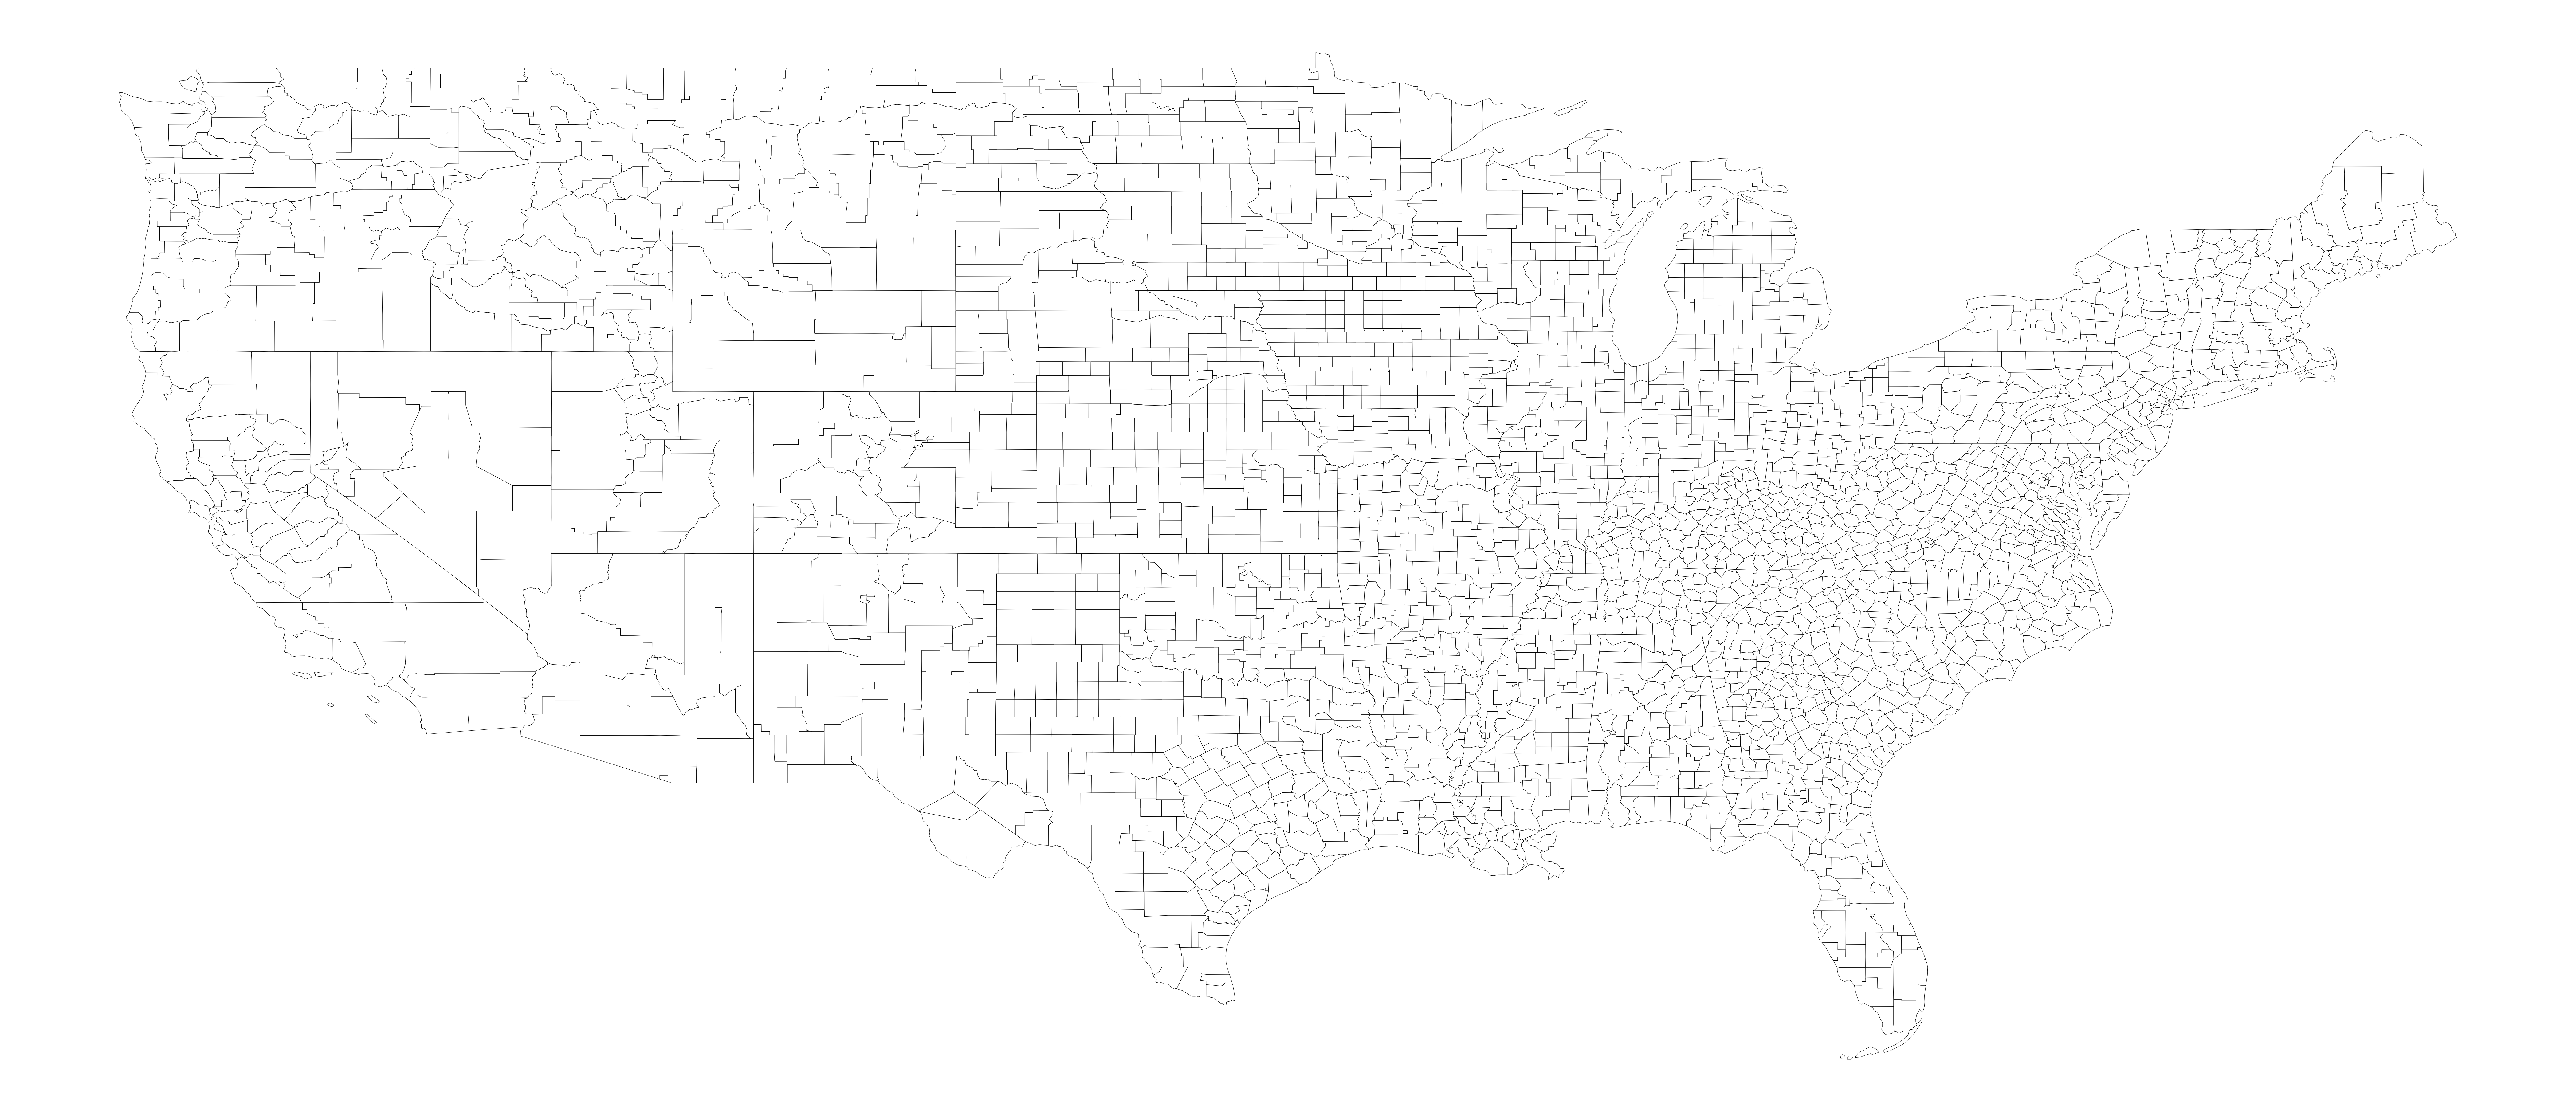

In [42]:
fig, ax = plt.subplots(figsize=(150,150))

ax = county_mask.plot(ax=ax, color='white', edgecolor='black')

ax.axis('off');

# Test on state illinois
Below is my test on state Illinois exclusively. I try to map only the state with its per capital income density based on year 2019



In [43]:
income_2019_il = income_2019[income_2019['state_name'] == ' Illinois']
# income_2019_il['perc_INCOME'] = income_2019_il['income_past12m']/sum(income_2019_il['income_past12m'])
income_2019_il['county_name'] = income_2019_il['county_name'].str.replace(r' County', '')
income_2019_il

<ipython-input-43-326d378a6e27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_2019_il['county_name'] = income_2019_il['county_name'].str.replace(r' County', '')


income_past12m county_name state_name
17051           23194     Fayette   Illinois
17107           27546       Logan   Illinois
17165           25342      Saline   Illinois
17097           45766        Lake   Illinois
17127           23539      Massac   Illinois
...               ...         ...        ...
17147           33468       Piatt   Illinois
17175           30018       Stark   Illinois
17005           28119        Bond   Illinois
17015           29166     Carroll   Illinois
17083           30182      Jersey   Illinois

[102 rows x 3 columns]

In [44]:
county_mask_il = county_mask[county_mask['STATE_NAME'] == 'Illinois']
county_mask_il

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        NAME           NAMELSAD STUSPS STATE_NAME LSAD       ALAND    AWATER                                           geometry
2         17      177  01785076  0500000US17177  17177  Stephenson  Stephenson County     IL   Illinois   06  1461392061   1350223  POLYGON ((-89.92647 42.50579, -89.83759 42.504...
11        17      155  00424279  0500000US17155  17155      Putnam      Putnam County     IL   Illinois   06   414649315  31195045  POLYGON ((-89.46639 41.23387, -89.35673 41.233...
105       17      159  00424281  0500000US17159  17159    Richland    Richland County     IL   Illinois   06   932484098   4874777  POLYGON ((-88.25778 38.73114, -88.25858 38.847...
136       17      095  00424249  0500000US17095  17095        Knox        Knox County     IL   Illinois   06  1855427713   8837382  POLYGON ((-90.43942 41.06399, -90.43765 41.151...
231       17      029  00424216  0500000US17029  17029       Coles       Coles County     IL   Illinois   06  1316418028   4650074  POLYGON ((-88.47207 39.65159, -88.06352 39.652...
...      ...      ...       ...             ...    ...         ...                ...    ...        ...  ...         ...       ...                                                ...
3056      17      059  00424231  0500000US17059  17059    Gallatin    Gallatin County     IL   Illinois   06   836413648  13357002  POLYGON ((-88.37453 37.90768, -88.37452 37.908...
3109      17      043  00422191  0500000US17043  17043      DuPage      DuPage County     IL   Illinois   06   848995066  22247645  POLYGON ((-88.26287 41.98638, -88.17410 41.987...
3110      17      065  00424234  0500000US17065  17065    Hamilton    Hamilton County     IL   Illinois   06  1125731578   3172088  POLYGON ((-88.70461 38.12519, -88.70239 38.256...
3111      17      067  00424235  0500000US17067  17067     Hancock     Hancock County     IL   Illinois   06  2055798688  53563362  POLYGON ((-91.49696 40.24870, -91.49289 40.269...
3132      17      035  00424219  0500000US17035  17035  Cumberland  Cumberland County     IL   Illinois   06   895989975   2538006  POLYGON ((-88.47091 39.21503, -88.47083 39.374...

[102 rows x 13 columns]

In [45]:
il_df = county_mask_il.merge(income_2019_il, how = 'inner', left_on ='NAME', right_on ='county_name')


In [55]:
il_df.crs

{'init': 'epsg:4269'}

<ipython-input-47-bd86db0ce736>:4: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  il_df.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\array.py:520: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return _unary_geo("boundary", self)
C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\geoseries.py:133: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  data = from_shapely(s.values)
C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\plotting.py:187: ShapelyDeprecationWarning: The array interface is deprecated and will no longe

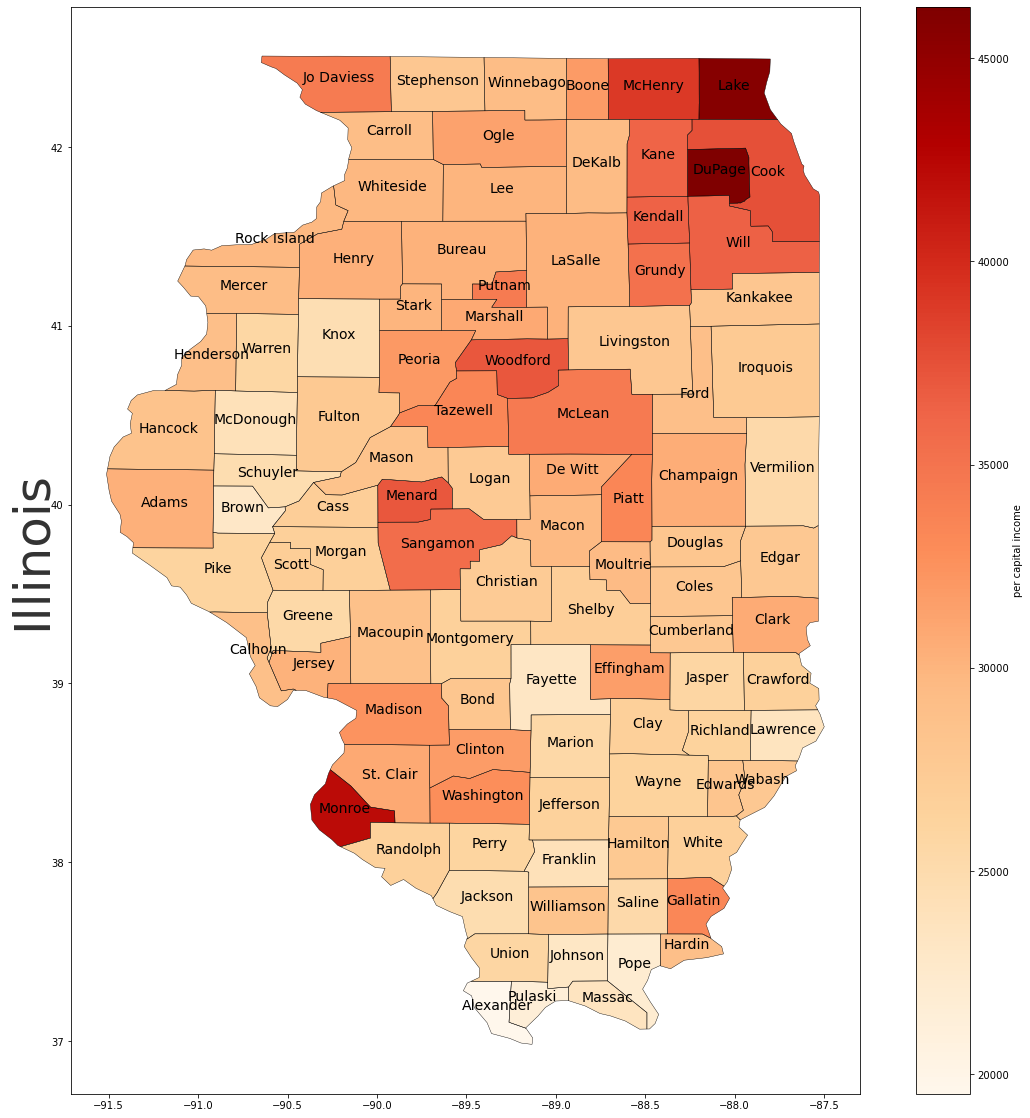

In [47]:
#https://jcutrer.com/python/learn-geopandas-plotting-usmaps
fig, ax = plt.subplots(figsize=(20,20))

il_df.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=14),axis=1);
il_df.boundary.plot(ax=ax, color='Black', linewidth=.4)
il_df.plot(ax=ax,column = 'income_past12m', figsize=(12, 12), legend = True,
           cmap='OrRd',
           legend_kwds={'label': "per capital income",
                        'orientation': "vertical",})
ax.text(-0.05, 0.5,'Illinois' , transform=ax.transAxes,
        fontsize=50, color='black', alpha=0.8,
        ha='center', va='center', rotation='90');

# Univerisity geometry
This under contains all school's geometry data

In [48]:
universities_shp = os.path.join(path, 'Colleges_and_Universities-shp', 'Colleges_and_Universities.shp')
universities = geopandas.read_file(universities_shp)

C:\Users\ShrekTheOger\anaconda3\lib\site-packages\geopandas\geodataframe.py:35: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  out = from_shapely(data)


In [49]:
universities.insert(6,'fips', universities['STATE'].map(us.states.mapping('abbr','fips')))
mask_contiguous_universities = universities['fips'].isin(contiguous_fips)
universities_mask = universities[mask_contiguous_universities]

In [54]:
universities_mask.crs

{'init': 'epsg:3857'}

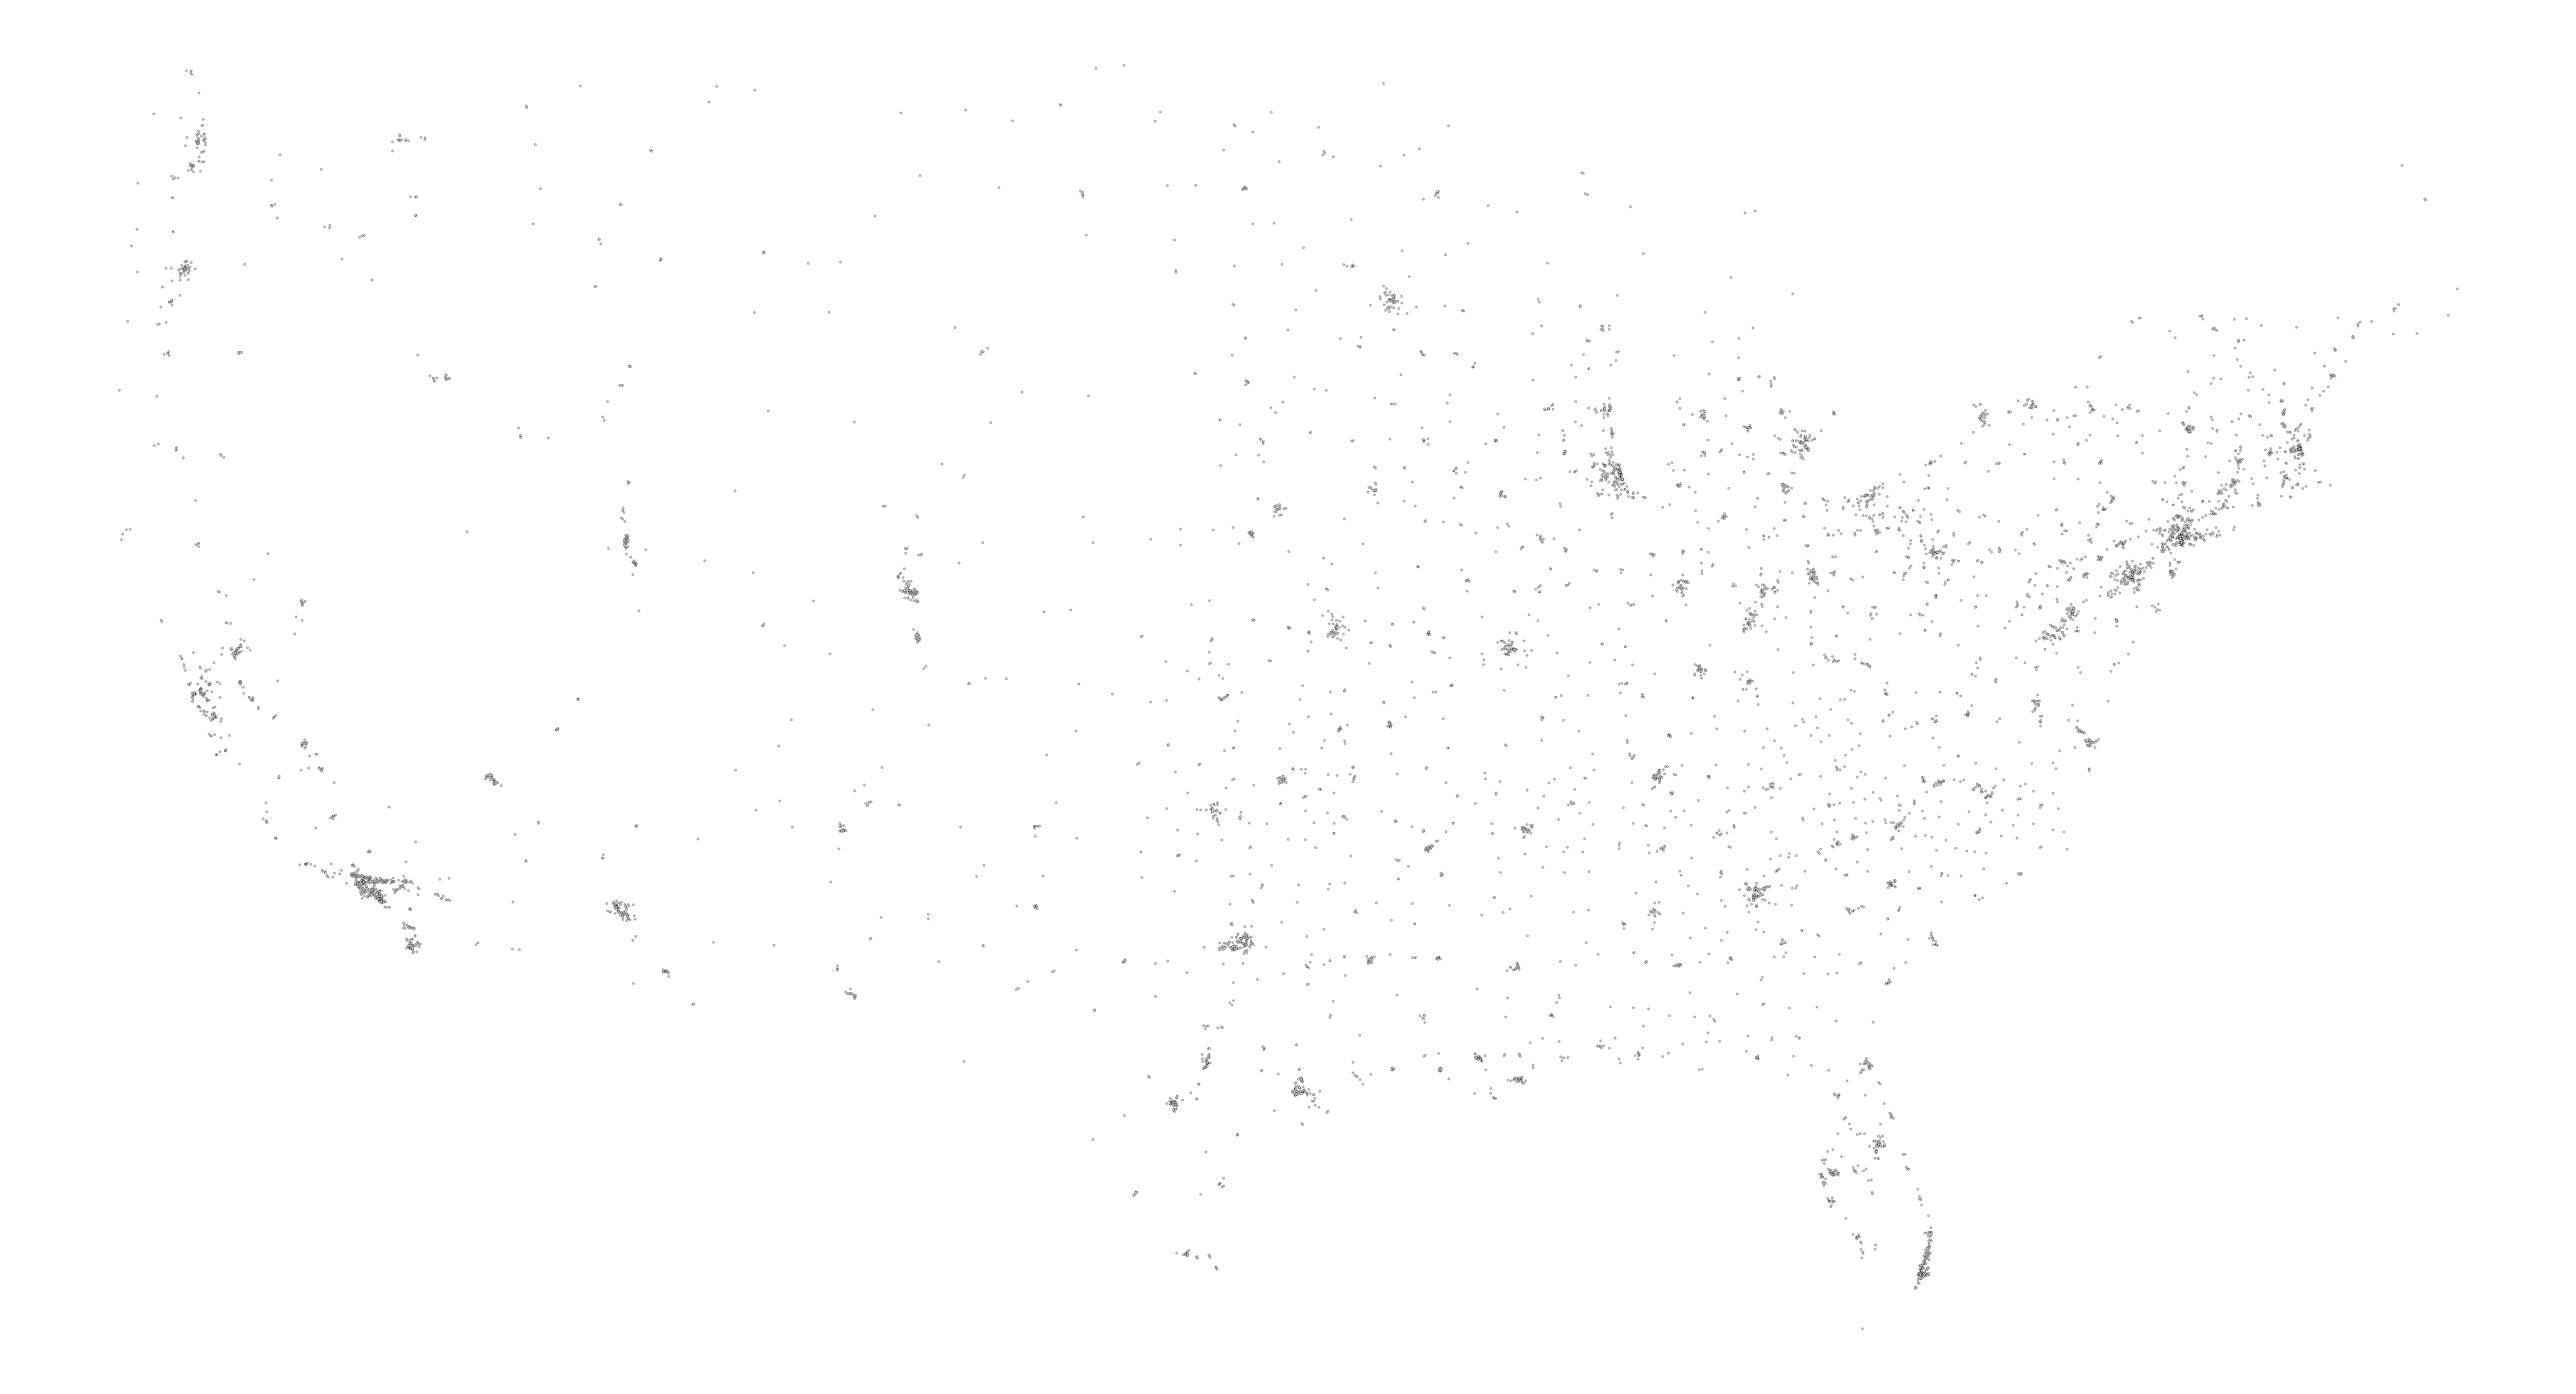

In [51]:
fig, ax = plt.subplots(figsize=(150,150))

ax = universities_mask.plot(ax=ax, color='white', edgecolor='black')

ax.axis('off');

In [52]:
uni_top_20 = universities_mask.merge(rd_id_data_filter, how='inner', on='IPEDSID')
uni_top_20

OBJECTID IPEDSID                                         NAME                                 ADDRESS             CITY STATE fips    ZIP           ZIP4       TELEPHONE  ... DORM_CAP TOT_EMP     SHELTER_ID                           geometry      state_name       2019       2015       2010 2000 1990
0       1102  162928                     JOHNS HOPKINS UNIVERSITY                       3400 N CHARLES ST        BALTIMORE    MD   24  21218           2688  (410) 516-8000  ...     2760   19757  NOT AVAILABLE   POINT (-8529381.150 4769027.527)        Maryland  2597238.0  2200312.0  2085599.0  NaN  NaN
1       1189  170976             UNIVERSITY OF MICHIGAN-ANN ARBOR                     503 THOMPSON STREET        ANN ARBOR    MI   26  48109  NOT AVAILABLE  (734) 764-1817  ...    12150   24255       10802823   POINT (-9321509.593 5202720.758)        Michigan  1491880.0  1306704.0  1232377.0  NaN  NaN
2       1197  179867            WASHINGTON UNIVERSITY IN ST LOUIS                     ONE BROOKINGS DRIVE      SAINT LOUIS    MO   29  63130           4899  (314) 935-5000  ...     7295   16222  NOT AVAILABLE  POINT (-10053441.254 4671392.815)        Missouri   789727.0   662351.0   724139.0  NaN  NaN
3       1343  199120  UNIVERSITY OF NORTH CAROLINA AT CHAPEL HILL                  103 SOUTH BLDG CB 9100      CHAPEL HILL    NC   37  27599  NOT AVAILABLE  (919) 962-2211  ...    10113   14065  NOT AVAILABLE   POINT (-8799917.432 4288545.827)  North Carolina  1027143.0   922600.0   785849.0  NaN  NaN
4       1582  190150  COLUMBIA UNIVERSITY IN THE CITY OF NEW YORK                WEST 116 ST AND BROADWAY         NEW YORK    NY   36  10027  NOT AVAILABLE  (212) 854-1754  ...    12928   20554  NOT AVAILABLE   POINT (-8233402.415 4984108.664)        New York   893465.0   828485.0   839902.0  NaN  NaN
5       1776  174066          UNIVERSITY OF MINNESOTA-TWIN CITIES                    100 CHURCH STREET SE      MINNEAPOLIS    MN   27  55455           0213  (612) 625-5000  ...     7294   18851       10789019  POINT (-10378907.743 5618034.049)       Minnesota   901920.0   840375.0   817885.0  NaN  NaN
6       2540  134130                        UNIVERSITY OF FLORIDA                             TIGERT HALL      GAINESVILLE    FL   12  32611  NOT AVAILABLE  (352) 392-3261  ...    10781   15448  NOT AVAILABLE   POINT (-9168403.507 3457136.107)         Florida   826718.0   705727.0   709129.0  NaN  NaN
7       3155  243744                          STANFORD UNIVERSITY                           NOT AVAILABLE         STANFORD    CA   06  94305  NOT AVAILABLE  (650) 723-2300  ...    12614   18655  NOT AVAILABLE  POINT (-13600465.429 4499631.996)      California  1071960.0   975822.0   873826.0  NaN  NaN
8       3217  214777    PENNSYLVANIA STATE UNIVERSITY-MAIN CAMPUS                            201 OLD MAIN  UNIVERSITY PARK    PA   42  16802           1503  (814) 865-4700  ...    14039   15462  NOT AVAILABLE   POINT (-8667520.806 4982997.544)    Pennsylvania   845449.0   754882.0   801628.0  NaN  NaN
9       3222  215293   UNIVERSITY OF PITTSBURGH-PITTSBURGH CAMPUS                       4200 FIFTH AVENUE       PITTSBURGH    PA   42  15260  NOT AVAILABLE  (412) 624-4141  ...     7831   13259  NOT AVAILABLE   POINT (-8900452.164 4930476.282)    Pennsylvania   962313.0   821849.0   855776.0  NaN  NaN
10      3304  228723       TEXAS A & M UNIVERSITY-COLLEGE STATION  JKW ADMINISTRATION BUILDING, SUITE 200  COLLEGE STATION    TX   48  77843           1248  (979) 845-3211  ...    13241   10967  NOT AVAILABLE  POINT (-10725543.086 3582299.984)           Texas   847654.0   827072.0   717532.0  NaN  NaN
11      3319  110635            UNIVERSITY OF CALIFORNIA-BERKELEY                     200 CALIFORNIA HALL         BERKELEY    CA   06  94720  NOT AVAILABLE  (510) 642-6000  ...     9678   12148  NOT AVAILABLE  POINT (-13608640.339 4561892.468)      California   714807.0   752471.0   722136.0  NaN  NaN
12      3320  110699       UNIVERSITY OF CALIFORNIA-SAN FRANCISCO

In [53]:
fig, ax = plt.subplots(figsize=(200,200))

ax = uni_top_20.plot(ax=ax, color='black', edgecolor='black')

ax.axis('off');